## W_N state generating function

In [166]:
import math as m
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister,QuantumCircuit,execute,Aer
from qiskit.tools.visualization import circuit_drawer,plot_histogram

#Set the qubit number fro W_N
n = 16
# Set the size circuit
qr = QuantumRegister(n,'q')
# cr = ClassicalRegister(n,'c')
circuit = QuantumCircuit(qr)


circuit.x(qr[0])
# B gate 
def B_gate(i,f,p,q):
    theta = np.arcsin(np.sqrt(p/q))
    circuit.u(-theta,0,0,qr[f])
    circuit.cx(qr[i],qr[f])
    circuit.u(theta,0,0,qr[f])
    circuit.cx(qr[f],qr[i])
    circuit.barrier()   
    
 # Logarithmic complexity circcuit generator 

condition = lambda num_, den_: num_ == 0 and den_ == 1 or num_ == 1 and den_==1
def generate_W(N):
    stack = []
    stack.append([0,1,N//2,N])
    idx_free = 2
    while stack:
        for i in range(len(stack)):
            node = stack.pop(0)
            idx_left, idx_right, num ,den = node
            # Apply gates
            #B_gate(idx_left,idx_right,num,den)
            yield (idx_left,idx_right, num, den)
            # Perform dichotomies
            num_left = m.floor(num/2) 
            num_right = m.ceil(num/2)
            den_left = m.floor(den/2)
            den_right = m.ceil(den/2)
            # Pruning
            if num_left == 1 and den_left == 1:
                num_left, den_left, num_right, den_right = num_right, den_right,num_left, den_left
            if not condition(num_left, den_left):
                stack.append([idx_left, idx_free ,num_left , den_left])
                idx_free += 1
            if not condition(num_right,den_right):
                stack.append([idx_right, idx_free, num_right, den_right])
                idx_free += 1
            



(0, 1, 8, 16)
(0, 2, 4, 8)
(1, 3, 4, 8)
(0, 4, 2, 4)
(2, 5, 2, 4)
(1, 6, 2, 4)
(3, 7, 2, 4)
(0, 8, 1, 2)
(4, 9, 1, 2)
(2, 10, 1, 2)
(5, 11, 1, 2)
(1, 12, 1, 2)
(6, 13, 1, 2)
(3, 14, 1, 2)
(7, 15, 1, 2)


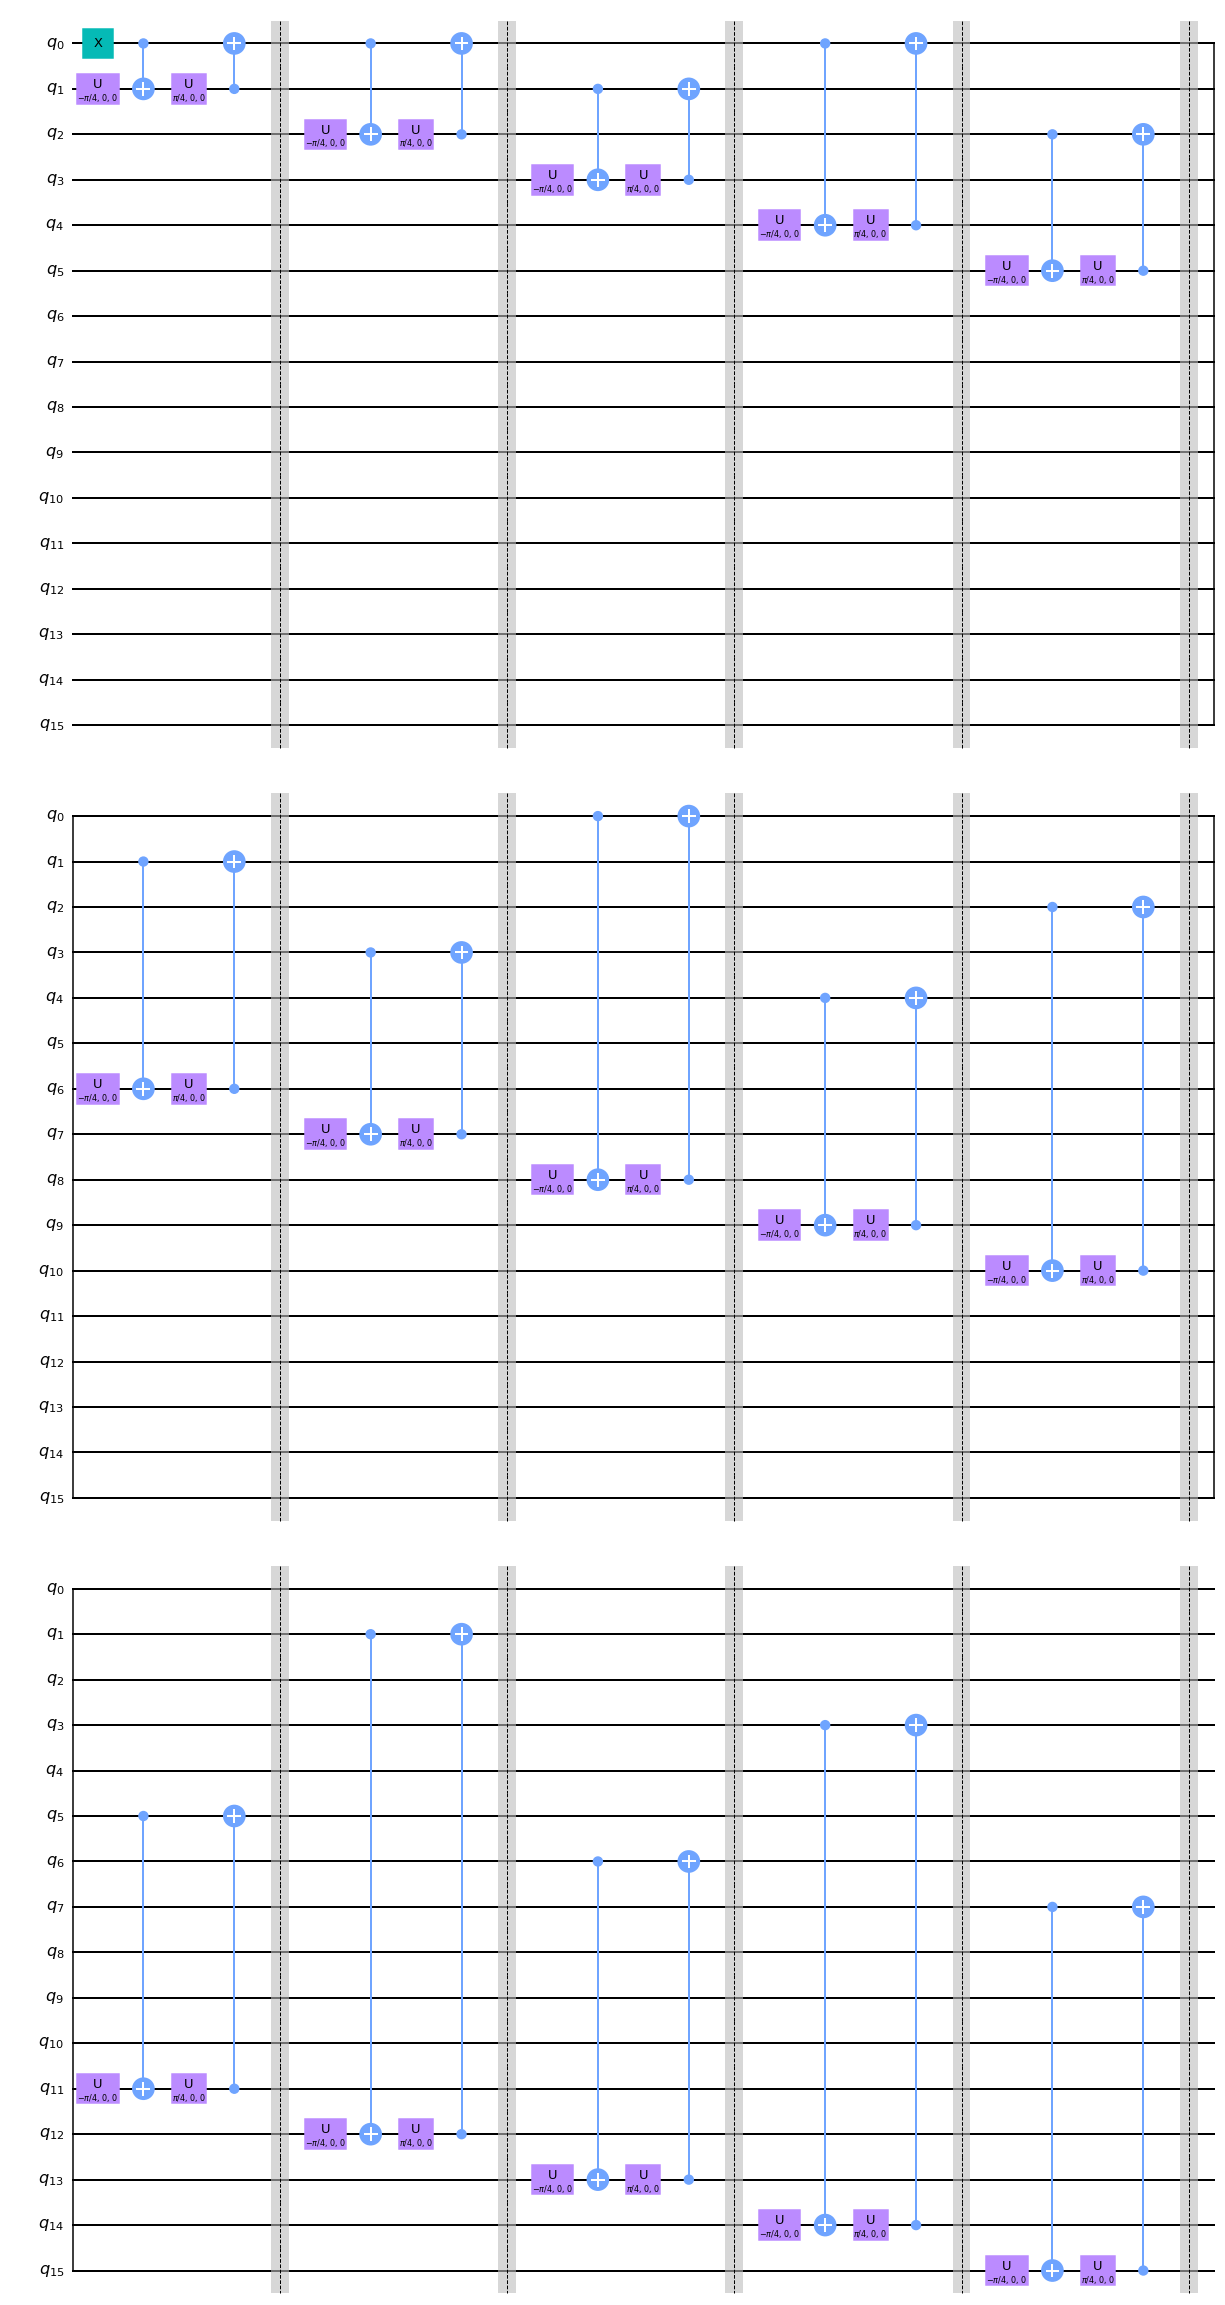

In [167]:
nodes_circuit = generate_W(n)

#Apply the respective gates for each node of the tree 

for node in nodes_circuit:
    
    idx_left,idx_right,num,den = node
    B_gate(idx_left,idx_right,num,den)

    print(node)
   

circuit.draw(output='mpl')


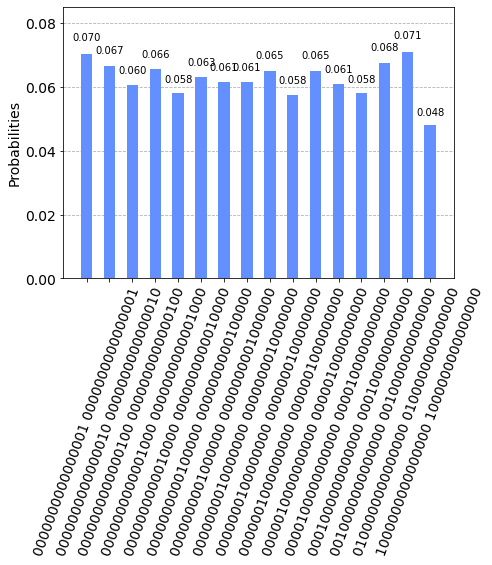

In [169]:
circuit.measure_all()
#シミュレーターの指定, select the simulator
simulator = Aer.get_backend('qasm_simulator')
#量子回路のシミュレーターを使った実行, Repeat circuit= #(shots) times
job = execute(circuit, simulator, shots=2000)

#測定結果の取り出し
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

## GHZ state generating function

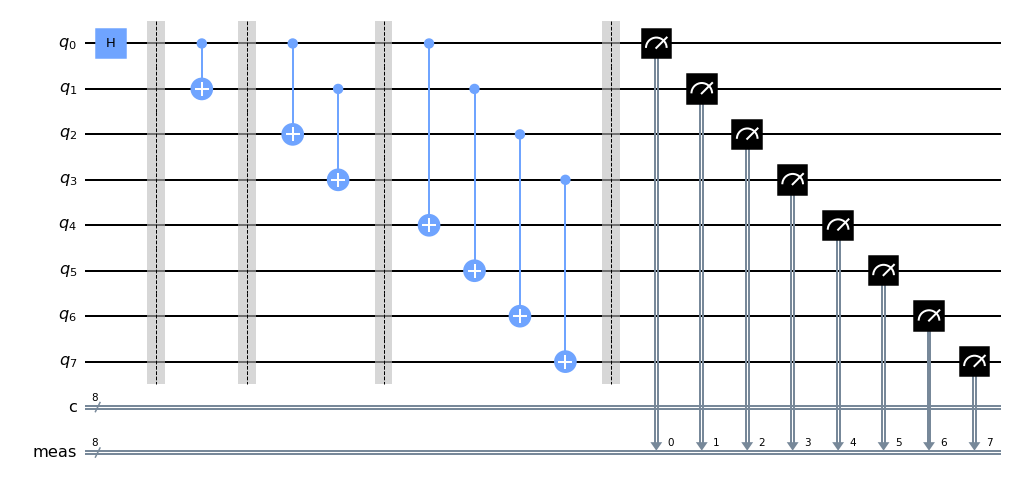

In [81]:
#qbit numer
n = 8
# Set the size circuit
qr = QuantumRegister(n,'q')
cr = ClassicalRegister(n,'c')
circuit = QuantumCircuit(qr,cr)


def generate_GHZ(n):
    circuit.h(qr[0]) 
    control=0
    target =1
    # Divide the circuit into powers of 2
    for i in range(m.ceil(np.log2(n))):
        j = 2**i
        control=0
        circuit.barrier()
    # Apply a cascade-like series of CNOT gates
        for k in range(j):
            if target > n-1:
                break
            circuit.cx(qr[control],qr[target])
            control+=1
            target+=1 
            

        
        
    
generate_GHZ(n)
circuit.measure_all()

#シミュレーターの指定, select the simulator
simulator = Aer.get_backend('qasm_simulator')
#量子回路のシミュレーターを使った実行, Repeat circuit= #(shots) times
job = execute(circuit, simulator, shots=100)

#測定結果の取り出し
result = job.result()
counts = result.get_counts(circuit)
circuit.draw(output='mpl')

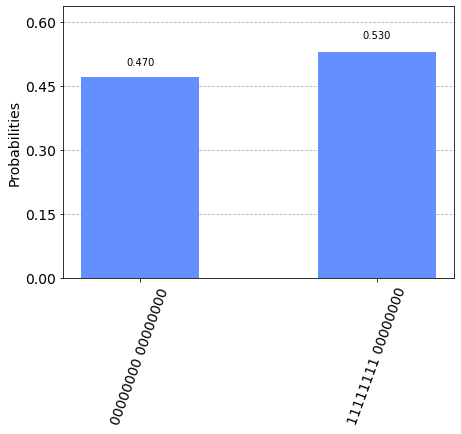

In [80]:
plot_histogram(counts)

3